# Pay Rises and Inflation

In order to compute pay rises and compare them to inflation we need to apply the compound formula. Assume and increase of $r_1$ perent in year 1. The new salary $S_1$ is then computed from the starting salary $S_0$
$$S_1 = \left(1+\frac{r_1}{100}\right)S_0$$
in year 2 with increase $r_2$ we have
$$S_2 = \left(1+\frac{r_2}{100}\right)S_1=\left(1+\frac{r_2}{100}\right)\left(1+\frac{r_1}{100}\right)S_0$$
and in year $n$
$$S_n = \prod^n_i\left(1+\frac{r_i}{100}\right)S_0$$

Every year we are getting a pay rise $P_i$ (in percent) negotiated nationally with the union. However, life is also getting more expensive. There are various measures for the inflation rate $I_i$. I use CPI here. 


In [4]:
import pandas

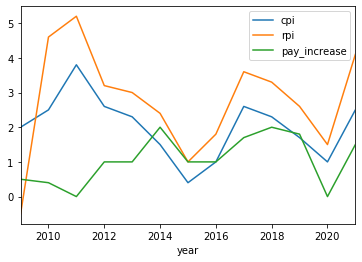

In [10]:
cpi_and_pay = pandas.read_csv('data/inflation_pay.csv', index_col='year')
cpi_and_pay.plot()

Using the compound formula above we can compute the salary in year $n$ $S^P_i$ due to actual pay rises and what it should have been if it had kept up with inflation $S^I_i$:
$$S^P_n = \prod^n_i\left(1+\frac{P_i}{100}\right)S_0$$
$$S^I_n = \prod^n_i\left(1+\frac{I_i}{100}\right)S_0$$
The graph shows that the inflation rate tends to be larger than the pay rises. Our salary should then be larger by 
$$\left(\frac{S^I_n}{S^P_n}-1\right)*100$$

In [12]:
def compound(data, col, year):
    c = 1
    for rate in data[col].loc[:year]:
        c = c*(1+rate/100)
    return c

In [15]:
(compound(cpi_and_pay, 'cpi',2021)/compound(cpi_and_pay, 'pay_increase',2021)-1)*100

12.858510502259657

In [16]:
(compound(cpi_and_pay, 'rpi',2021)/compound(cpi_and_pay, 'pay_increase',2021)-1)*100

23.839833256605015

So, our pay in 2021 should have been 23.84% larger if it had kept up with inflation as measured by RPI.

We can also compute the total salary lost over those years. In year $j$ we have lost
$$L_j = S^I_j - S^P_j$$
and the total lost is then
$$L = \sum_j^n\left(S^I_j - S^P_j\right)$$

Assuming the median salary of 36000 pound in 2020 we need to calculate what it would have been like in 2009:
$$S_0 = \frac{S_n}{\prod^n_i\left(1+\frac{P_i}{100}\right)}$$

In [17]:
median_salary = 36000
salary = median_salary/compound(cpi_and_pay, 'pay_increase',2021)
salary

31360.43761616677

So the median salary in 2009 was 31799 pounds.

In [18]:
total = 0
for y in cpi_and_pay.index:
    loss = (compound(cpi_and_pay, 'rpi', y) - compound(cpi_and_pay, 'pay_increase',y))*salary
    total += loss
total

59454.80059127253

## Summary
If our salary had kept up with inflation it should be about 24% larger. If you are on the median salary of 36000 this would be 8640 pounds more, ie 44640 pounds in 2021. Since 2009 they would have lost 59454 pounds in total.